In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

Importing plotly failed. Interactive plots will not work.


In [2]:
df = read_csv('Data/service_request_compare/sr_hex.csv')

In [3]:
df2 = df.loc[((df['department'] == 'Water and Sanitation'))]

In [4]:
df2 = df2[['CreationTimestamp','h3_level8_index']]

In [5]:
df2.head()

,CreationTimestamp,h3_level8_index
0,2017-01-01 18:57:26+02:00,88ad368893fffff
1,2017-01-01 17:36:57+02:00,88ad361701fffff
3,2017-01-01 09:22:03+02:00,88ad36d55bfffff
4,2017-01-01 14:11:55+02:00,0
7,2017-01-01 19:55:55+02:00,88ad368d23fffff


In [6]:
df2['CreationTimestamp'] = df2.loc[:, ('CreationTimestamp')].astype(str).str[:10]

In [7]:
df2['h3_level8_index'] = df2['h3_level8_index'].astype(str)

In [8]:
df2.insert(loc=2, column='Total_Requests',value=1)

In [9]:
df2['CreationTimestamp'] = pd.to_datetime(df2['CreationTimestamp'])

In [10]:
df2 = df2.groupby(['h3_level8_index', pd.Grouper(key='CreationTimestamp', freq='W-WED')])['Total_Requests'].sum().reset_index().sort_values('CreationTimestamp')
print (df2)

        h3_level8_index CreationTimestamp  Total_Requests
0                     0        2017-01-04             237
54363   88ad361297fffff        2017-01-04               3
24606   88ad36103bfffff        2017-01-04              23
159409  88ad36c495fffff        2017-01-04               1
13259   88ad36026dfffff        2017-01-04               1
...                 ...               ...             ...
172618  88ad36c74bfffff        2020-01-01               2
184768  88ad36d717fffff        2020-01-01               6
167249  88ad36c685fffff        2020-01-01               1
167431  88ad36c691fffff        2020-01-01               3
80493   88ad36181bfffff        2020-01-01               7

[185823 rows x 3 columns]


In [11]:
df3 = df2.loc[~((df2['h3_level8_index'] == '0'))]

In [12]:
df3 = df3.groupby(by=['CreationTimestamp']).sum('Total_Requests').reset_index()

In [13]:
df3.tail()

,CreationTimestamp,Total_Requests
152,2019-12-04,9798
153,2019-12-11,9351
154,2019-12-18,8262
155,2019-12-25,7064
156,2020-01-01,4724


In [14]:
# prepare expected column names
df3.columns = ['ds', 'y']

In [39]:
model = Prophet()

train, test = train_test_split(df3, test_size = 0.10, shuffle=False)
model_fit = model.fit (train)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
future = model_fit.make_future_dataframe(periods=20, freq='W')
predictions = model_fit.predict(future)

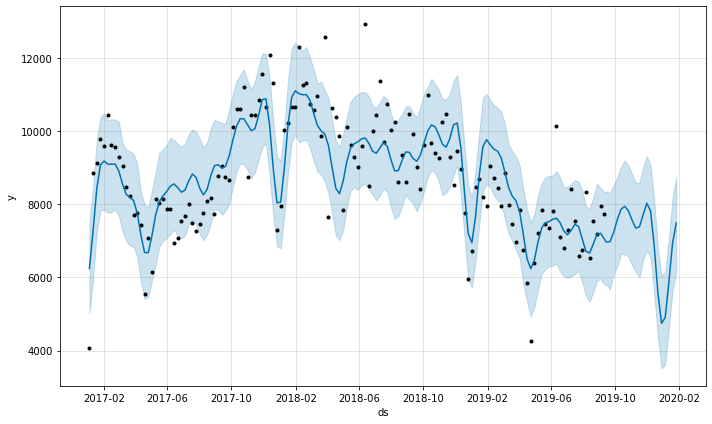

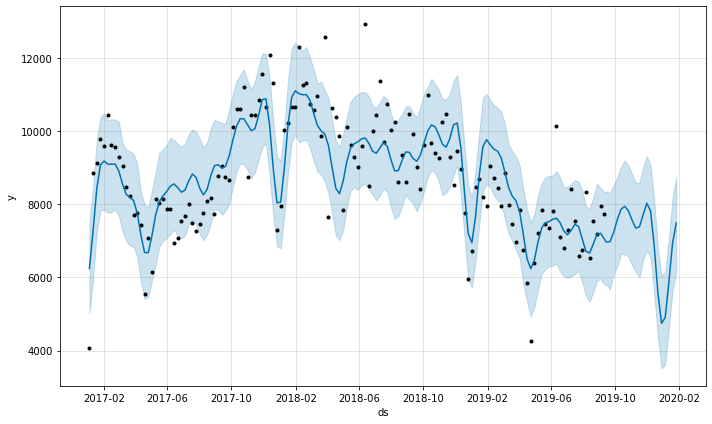

In [41]:
model_fit.plot(predictions)

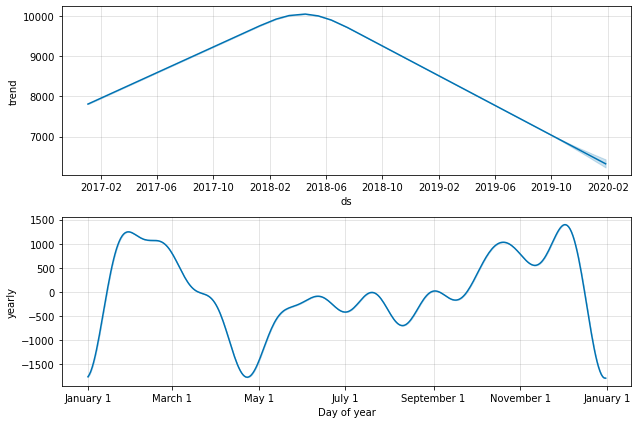

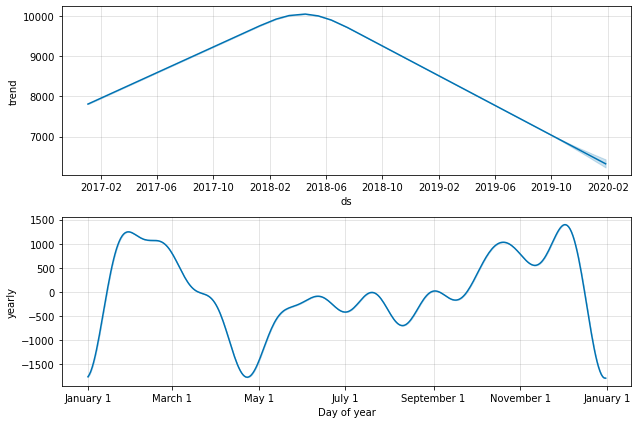

In [42]:
model_fit.plot_components(predictions)

In [43]:
predictions['yhat'] = np.round(predictions['yhat'])
final = predictions.rename({'ds': 'date','yhat' : 'Service Requests Expected'}, axis=1)

In [44]:
print("Final Answer:" )
final[['date','Service Requests Expected']].tail()


Final Answer:


,date,Service Requests Expected
156,2019-12-29,4746.0
157,2020-01-05,4907.0
158,2020-01-12,5879.0
159,2020-01-19,6939.0
160,2020-01-26,7490.0


In [45]:
df3.tail()

,ds,y
152,2019-12-04,9798
153,2019-12-11,9351
154,2019-12-18,8262
155,2019-12-25,7064
156,2020-01-01,4724
